# Лабораторная работа №2

Будем использовать тот же датасет, что мы использовали в прошлой работе

Дла начала, добавим в наш исходный датасет новый атрибут: Beats Per Track (BPT) - количество тактов на протяжении всего трека. BPT = BPM * (Длительность трека в минутах).

Сперва считаем наш датасет

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy
import seaborn

data = pd.read_csv("../dataset/spotify.csv")

Теперь добавим новый атрибут

In [2]:
bpt_list = []
for i, row in data.iterrows():
    minutes = row['duration_ms'] / (1000 * 60)
    bpt = minutes * row['tempo']
    bpt_list.append(bpt)

bpt = pd.Series(bpt_list)
data.insert(0, "bpt", bpt)

In [3]:
# сводка по данным
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10078 entries, 0 to 10077
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   bpt               9528 non-null   float64
 1   trackName         10078 non-null  object 
 2   artistName        10078 non-null  object 
 3   genre             8578 non-null   object 
 4   danceability      9528 non-null   float64
 5   energy            9528 non-null   float64
 6   key               9528 non-null   float64
 7   loudness          9528 non-null   float64
 8   mode              9528 non-null   float64
 9   speechiness       9528 non-null   float64
 10  acousticness      9528 non-null   float64
 11  instrumentalness  9528 non-null   float64
 12  liveness          9528 non-null   float64
 13  valence           9528 non-null   float64
 14  tempo             9528 non-null   float64
 15  duration_ms       9528 non-null   float64
 16  time_signature    9528 non-null   float6

### "Причешем" наш датасет

Для построения графиков зависимостей атрибутов, сперва удалим все данные с ненужной информацией

In [4]:
data = data.drop(['trackName', 'artistName', 'genre', 'mode', "key", "time_signature", "duration_ms", "time_signature"], axis="columns")
data = data.dropna()

Сразу же нормализуем оставшиеся значения

In [5]:
from sklearn.preprocessing import MinMaxScaler

normalizer = MinMaxScaler()
normed_data = normalizer.fit_transform(data)
data = pd.DataFrame(normed_data, columns=data.columns.tolist())

Отбросим данные с выбросами по Z-Score (Z-Score < 2)

In [6]:
from scipy import stats
data.info()
for attr in data:
    attr_zscore = np.abs(stats.zscore(data[attr]))
    data[attr] = data[attr][attr_zscore<3]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9528 entries, 0 to 9527
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   bpt               9528 non-null   float64
 1   danceability      9528 non-null   float64
 2   energy            9528 non-null   float64
 3   loudness          9528 non-null   float64
 4   speechiness       9528 non-null   float64
 5   acousticness      9528 non-null   float64
 6   instrumentalness  9528 non-null   float64
 7   liveness          9528 non-null   float64
 8   valence           9528 non-null   float64
 9   tempo             9528 non-null   float64
dtypes: float64(10)
memory usage: 744.5 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9528 entries, 0 to 9527
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   bpt               9472 non-null   float64
 1   danceability      9456 non-null  

In [7]:
for attr in data:
    data[attr] = data[attr].fillna(0.5)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9528 entries, 0 to 9527
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   bpt               9528 non-null   float64
 1   danceability      9528 non-null   float64
 2   energy            9528 non-null   float64
 3   loudness          9528 non-null   float64
 4   speechiness       9528 non-null   float64
 5   acousticness      9528 non-null   float64
 6   instrumentalness  9528 non-null   float64
 7   liveness          9528 non-null   float64
 8   valence           9528 non-null   float64
 9   tempo             9528 non-null   float64
dtypes: float64(10)
memory usage: 744.5 KB


### Построим матрциу графиков рассеивания

In [8]:
scatter = pd.plotting.scatter_matrix(
    data,
    figsize=(23, 23)
)

По данным графикам тяжело разглядеть какие-либо кластеры

## Попробуем применить метод К-средних к нашему датасету

Так как датасет 10-мерный, его кластеры будет тяжело визулизировать. Поставим задачу снизить размерность при помощи PCA.

### Снижение размерности

Предварительно стандартизуем наши данные

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
data = pd.DataFrame(scaled_data, columns=data.columns.tolist())

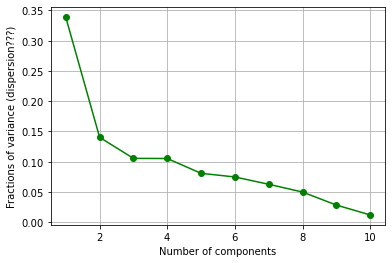

In [10]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit_transform(data)

# достаем значения дисперсии
disp = pca.explained_variance_ratio_
# количество компонент
PC_numbers = np.arange(pca.n_components_) + 1

# график чтобы выбрать нужное колчество компонент с помощью критерия крутого склона
plt.plot(PC_numbers, disp, "go-")
plt.xlabel("Number of components")
plt.ylabel("Fractions of variance (dispersion???)")
plt.grid()
plt.show()

Выберем число главных компонент = 2

In [11]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(data)

pca_data = pd.DataFrame(pca_data, columns = ['PC1', 'PC2'])

### Применим алгоритм K-средних для разного числа кластеров

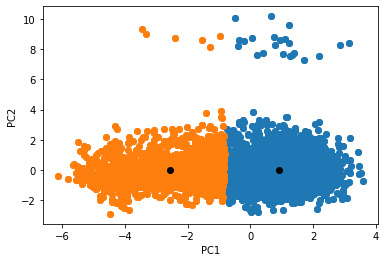

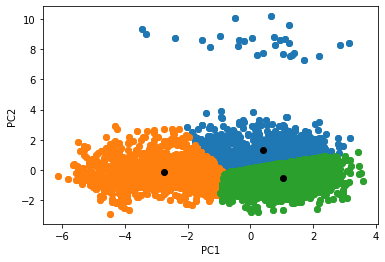

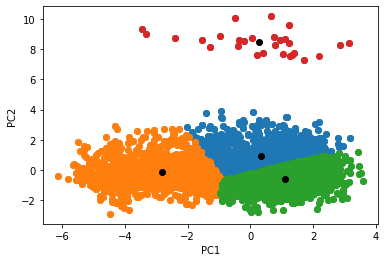

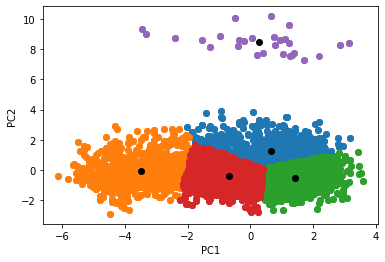

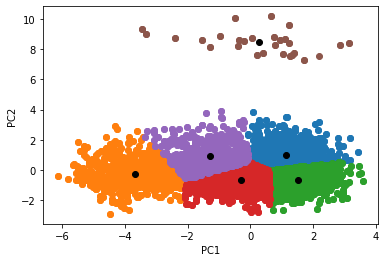

In [12]:
from sklearn.cluster import KMeans

# максимальное число кластеров, которых хотим получить
max_clusters = 6

for i in range(2, max_clusters + 1):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(pca_data)

    centers = kmeans.cluster_centers_
    labels = kmeans.labels_

    data_plot = pca_data.to_numpy()
    
    labels_map = dict()
    
    for i, el in enumerate(labels):
        v = labels_map.get(el)
        if v is not None and len(v) >= 0:
            labels_map[el].append(data_plot[i])
        else:
            labels_map[el] = []


    plt.xlabel("PC1")
    plt.ylabel("PC2")
    
    
    for label in labels_map.keys():
        x = []
        y = []
        for coord in labels_map[label]:
            x.append(coord[0])
            y.append(coord[1])
        plt.scatter(x, y)
            

    plt.scatter(centers[:, 0], centers[:, 1], c='black')
    plt.show()

# Вывод

In [ ]:
В ходе работы мы добавили новый аттрибут в существующий датасет, затем этот датасет был обработан (выявлены выбросы, проведена нормализация и стандартизация).
Затем мы построили матрицу графиков рассеивания, методом главных компонент уменьшили размерность датасета и посмотрели, каким образом этот уменьшенный датасет будет разбиваться на произольное число кластеров методо